In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.ticker as mticker

import initialise
import common

In [2]:
SMALL_SIZE = 7
MEDIUM_SIZE = 8
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

In [3]:
# samples_file_australia = os.path.join(common.DATASETS_DIR, 'australia_samples_365days_v1.csv')
# samples_file_conus = os.path.join(common.DATASETS_DIR, 'samples_365days_v2.csv')
# samples_file_europe = os.path.join(common.DATASETS_DIR, 'europe_samples_365days_v2.csv')
samples_file_australia = os.path.join(common.DATASETS_DIR, 'australia_samples_365days.csv')
samples_file_conus = os.path.join(common.DATASETS_DIR, 'samples_365days.csv')
samples_file_europe = os.path.join(common.DATASETS_DIR, 'europe_samples_365days.csv')
australia_samples = pd.read_csv(samples_file_australia, index_col=0)
conus_samples = pd.read_csv(samples_file_conus, index_col=0)
europe_samples = pd.read_csv(samples_file_europe, index_col=0)
output_dir = common.FIGURES_DIR

In [4]:
australia_sites = australia_samples[['Site', 'Czone2', 'Czone3', 'LC Category', 'Land Cover']].drop_duplicates().set_index('Site')
conus_sites = conus_samples[['Site', 'Czone2', 'Czone3', 'LC Category', 'Land Cover']].drop_duplicates().set_index('Site')
europe_sites = europe_samples[['Site', 'Czone2', 'Czone3', 'LC Category', 'Land Cover']].drop_duplicates().set_index('Site')

In [5]:
rs = np.random.RandomState(345) #987 #345 #7654 #9876

sample_sites = pd.concat([
    australia_sites[(australia_sites['Czone3'] == 'BSk') & (australia_sites['LC Category'] == 'Grassland')].sample(1, random_state=rs),
    australia_sites[(australia_sites['Czone2'] == 'Cf') & (australia_sites['LC Category'] == 'Shrubland')].sample(1, random_state=rs),
    australia_sites[(australia_sites['Czone3'] == 'Csb') & (australia_sites['LC Category'] == 'Forest')].sample(1, random_state=rs),

    conus_sites[(conus_sites['Czone3'] == 'BSk') & (conus_sites['LC Category'] == 'Grassland')].sample(1, random_state=rs),
    conus_sites[(conus_sites['Czone2'] == 'Cf') & (conus_sites['LC Category'] == 'Shrubland')].sample(1, random_state=rs),
    conus_sites[(conus_sites['Czone3'] == 'Csb') & (conus_sites['LC Category'] == 'Forest')].sample(1, random_state=rs),

    europe_sites[(europe_sites['Czone3'] == 'BSk') & (europe_sites['LC Category'] == 'Grassland')].sample(1, random_state=rs),
    europe_sites[(europe_sites['Czone2'] == 'Cf') & (europe_sites['LC Category'] == 'Shrubland')].sample(1, random_state=rs),
    europe_sites[(europe_sites['Czone3'] == 'Csb') & (europe_sites['LC Category'] == 'Forest')].sample(1, random_state=rs),
], keys=['Australia'] * 3 + ['CONUS'] * 3 + ['Europe'] * 3)

sample_sites = sample_sites.reset_index(0)
sample_sites

,level_0,Czone2,Czone3,LC Category,Land Cover
Site,,,,,
C10_15,Australia,BS,BSk,Grassland,Herbaceous cover
C10_7,Australia,Cf,Cfb,Shrubland,Shrubland deciduous
C11_6,Australia,Cs,Csb,Forest,"Tree cover, broadleaved, evergreen, closed to ..."
C6_611,CONUS,BS,BSk,Grassland,Grassland
C6_166,CONUS,Cf,Cfa,Shrubland,Shrubland
C6_580,CONUS,Cs,Csb,Forest,"Tree cover, needleleaved, evergreen, closed to..."
C8_1,Europe,BS,BSk,Grassland,Herbaceous cover
C2_12,Europe,Cf,Cfb,Shrubland,Shrubland
C15_1,Europe,Cs,Csb,Forest,"Tree cover, broadleaved, deciduous, closed to ..."


In [6]:
rs = np.random.RandomState(345) #987 #345 #7654 #9876

sample_sites = pd.concat([
    australia_sites[(australia_sites['Czone2'] == 'Cf') & (australia_sites['LC Category'] == 'Agriculture')].sample(1, random_state=rs),
    conus_sites[(conus_sites['Czone2'] == 'Cf') & (conus_sites['LC Category'] == 'Agriculture')].sample(1, random_state=rs),
    europe_sites[(europe_sites['Czone2'] == 'Cf') & (europe_sites['LC Category'] == 'Agriculture')].sample(1, random_state=rs),

    australia_sites[(australia_sites['Czone3'] == 'Csb') & (australia_sites['LC Category'] == 'Forest')].sample(1, random_state=rs),
    conus_sites[(conus_sites['Czone3'] == 'Csb') & (conus_sites['LC Category'] == 'Forest')].sample(1, random_state=rs),
    europe_sites[(europe_sites['Czone3'] == 'Csb') & (europe_sites['LC Category'] == 'Forest')].sample(1, random_state=rs),

    australia_sites[(australia_sites['Czone3'] == 'BSk') & (australia_sites['LC Category'] == 'Grassland')].sample(1, random_state=rs),
    conus_sites[(conus_sites['Czone3'] == 'BSk') & (conus_sites['LC Category'] == 'Grassland')].sample(1, random_state=rs),
    europe_sites[(europe_sites['Czone3'] == 'BSk') & (europe_sites['LC Category'] == 'Grassland')].sample(1, random_state=rs),

    australia_sites[(australia_sites['Czone2'] == 'BS') & (australia_sites['LC Category'] == 'Shrubland')].sample(1, random_state=rs),
    conus_sites[(conus_sites['Czone2'] == 'BS') & (conus_sites['LC Category'] == 'Shrubland')].sample(1, random_state=rs),
    europe_sites[(europe_sites['Czone2'] == 'BS') & (europe_sites['LC Category'] == 'Shrubland')].sample(1, random_state=rs),

], keys=['Australia', 'CONUS', 'Europe'] * 4)

sample_sites = sample_sites.reset_index(0)
sample_sites

,level_0,Czone2,Czone3,LC Category,Land Cover
Site,,,,,
C10_20,Australia,Cf,Cfb,Agriculture,"Cropland, rainfed"
C6_146,CONUS,Cf,Cfa,Agriculture,"Cropland, rainfed"
C2_60,Europe,Cf,Cfb,Agriculture,"Cropland, rainfed"
C11_13,Australia,Cs,Csb,Forest,"Tree cover, broadleaved, evergreen, closed to ..."
C6_874,CONUS,Cs,Csb,Forest,"Tree cover, needleleaved, evergreen, closed to..."
C2_57,Europe,Cs,Csb,Forest,"Tree cover, needleleaved, evergreen, closed to..."
C10_15,Australia,BS,BSk,Grassland,Herbaceous cover
C6_688,CONUS,BS,BSk,Grassland,Grassland
C8_1,Europe,BS,BSk,Grassland,Herbaceous cover


In [7]:
modis_dir = r'G:\My Drive\LFMC Data\GEE_SR-ORG-6974_463\MCD43A4'
modis_csv = {}
for site in sample_sites.index: #reset_index().Site:
    f = f'{site}.csv'
    modis_csv[site] = pd.read_csv(os.path.join(modis_dir, f), index_col=0, parse_dates=True)

In [8]:
bands = ['Red', 'NIR-1', 'Blue', 'Green', 'NIR-2', 'SWIR-16', 'SWIR-22']
#NIR-1 = NIR-8?
#NIR-2 = NIR-12?
styles = ['-', '--', '-.', ':', ':', '-', '--']
set1 = matplotlib.colormaps['Set1']
modis_colours = ListedColormap([set1.colors[i] for i in [0, 3, 1, 2, 7, 4, 6]])
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '']
month_ends = [0, 31, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335, 366]
fig_labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']

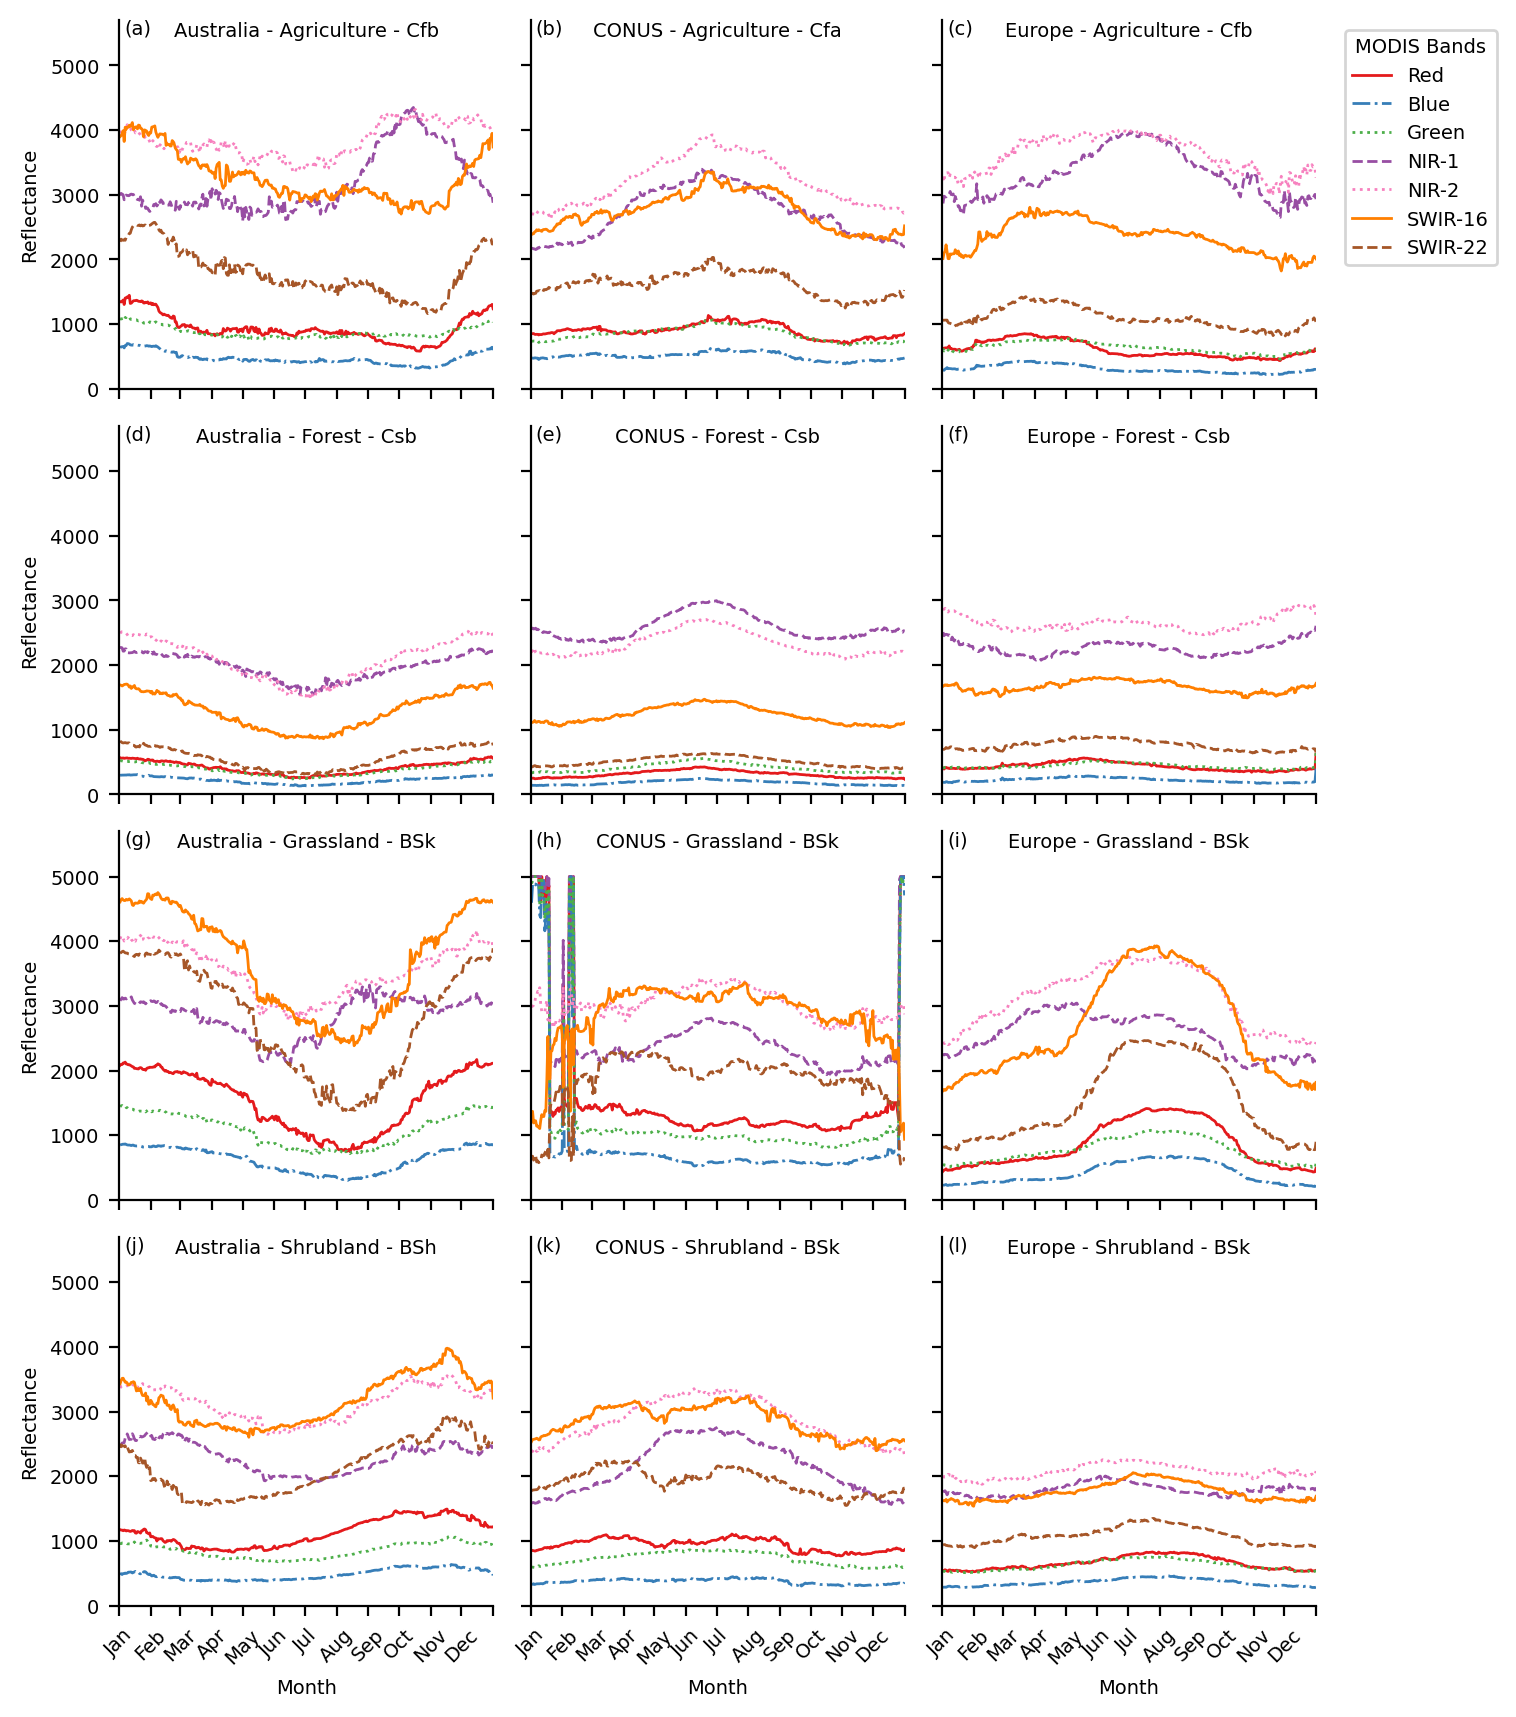

In [9]:
fig1, axes = plt.subplots(nrows=4, ncols=3, figsize=(7.927, 10.5), dpi=200, #layout='constrained',
                          gridspec_kw={'wspace': 0.1, 'hspace': 0.1}, sharex=True, sharey=True)
for n, (site, data) in enumerate(modis_csv.items()):
    ax = axes.flatten()[n]
#    data[data.index.year == 2014].plot(ax=ax, colormap=modis_colours, style=styles, lw=1)
    data.groupby(data.index.dayofyear).median().clip(upper=5000).plot(ax=ax, colormap=modis_colours, style=styles, lw=1)
    title = f"{sample_sites.loc[site, 'level_0']} - {sample_sites.loc[site, 'LC Category']} - {sample_sites.loc[site, 'Czone3']}"
    ax.set_title(title, y=0.91)
    if n == 0:
        h, l = ax.get_legend_handles_labels()
    ax.legend().remove()
    ax.tick_params(axis='x', which='minor', top=False, bottom=False)
    # ticks_loc = ax.get_xticks().tolist()
    # ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
    ax.set_xticks(month_ends)
    ax.set_xticklabels(months, rotation=45) #, ha='right')
    ax.set_xlim(0, 366)
    ax.set_ylim(0, 5700)
    ax.set_xlabel('Month')
    ax.set_ylabel('Reflectance')
    ax.text(5, 5480, f'({fig_labels[n]})', size=SMALL_SIZE)
    for axis in ['top', 'right']:
        ax.spines[axis].set_visible(False)
fig1.subplots_adjust(right=0.88)
#fig1.get_layout_engine(0, 0.1, 1, 1)
plot_order = [0, 2, 3, 1, 4, 5, 6]
# fig1.legend(handles=[h[idx] for idx in plot_order], labels=[bands[idx] for idx in plot_order],
#             ncol=7, loc=(0.1, 0.01), title='MODIS Bands', title_fontsize=SMALL_SIZE) 
fig1.legend(handles=[h[idx] for idx in plot_order], labels=[bands[idx] for idx in plot_order],
            ncol=1, loc='upper right', bbox_to_anchor=(0, 0, 1, 0.88), title='MODIS Bands', title_fontsize=SMALL_SIZE) 
#            ncol=1, bbox_to_anchor=(0.9, 0.73, 0.1, 0.15), title='MODIS Bands', title_fontsize=SMALL_SIZE) 

fig1.savefig(os.path.join(output_dir, 'modis dist.jpeg'), format="jpeg",
                    bbox_inches='tight', pad_inches=0.05, dpi=500)

In [46]:
modis_csv['C6_611'].groupby(data.index.dayofyear).median().clip(upper=5000).loc[0:31]

,Nadir_Reflectance_Band1,Nadir_Reflectance_Band2,Nadir_Reflectance_Band3,Nadir_Reflectance_Band4,Nadir_Reflectance_Band5,Nadir_Reflectance_Band6,Nadir_Reflectance_Band7
id,,,,,,,
1,5000.0,5000.0,5000.0,5000.0,2857.0,1136.0,534.0
2,5000.0,5000.0,5000.0,5000.0,2860.0,1124.0,538.5
3,5000.0,5000.0,5000.0,5000.0,2870.0,1136.0,546.0
4,5000.0,5000.0,5000.0,5000.0,3124.0,1135.0,538.0
5,5000.0,5000.0,5000.0,5000.0,3119.5,1126.5,501.5
6,5000.0,5000.0,5000.0,5000.0,2847.0,1054.0,498.0
7,5000.0,5000.0,5000.0,5000.0,2848.0,1091.0,526.0
8,5000.0,5000.0,5000.0,5000.0,2818.0,1008.5,507.0
9,5000.0,5000.0,5000.0,5000.0,2783.0,1059.0,509.0


In [34]:
modis_csv['C6_611'][modis_csv['C6_611'].index.dayofyear == 58]

,Nadir_Reflectance_Band1,Nadir_Reflectance_Band2,Nadir_Reflectance_Band3,Nadir_Reflectance_Band4,Nadir_Reflectance_Band5,Nadir_Reflectance_Band6,Nadir_Reflectance_Band7
id,,,,,,,
2001-02-27,880.0,1675.0,465.0,732.0,2383.0,2592.0,1600.0
2002-02-27,5057.0,4777.0,4905.0,5079.0,2282.0,1162.0,793.0
2003-02-27,954.0,1755.0,514.0,798.0,2428.0,2581.0,1934.0
2004-02-27,6367.0,5630.0,6348.0,6454.0,2016.0,564.0,226.0
2005-02-27,780.0,1685.0,410.0,650.0,2281.0,2446.0,1638.0
2006-02-27,1036.0,1595.0,520.0,801.0,2240.0,2340.0,1498.0
2007-02-27,6131.0,5827.0,6030.0,6154.0,2233.0,931.0,473.0
2008-02-27,6337.0,5865.0,6659.0,6858.0,2106.0,589.0,314.0
2009-02-27,4983.0,4978.0,4837.0,5122.0,2246.0,905.0,721.0


In [41]:
modis_csv['C6_611'][modis_csv['C6_611'].index.dayofyear == 58].median()

Nadir_Reflectance_Band1    4983.0
Nadir_Reflectance_Band2    4777.0
Nadir_Reflectance_Band3    4837.0
Nadir_Reflectance_Band4    5079.0
Nadir_Reflectance_Band5    2383.0
Nadir_Reflectance_Band6    1901.0
Nadir_Reflectance_Band7     793.0
dtype: float64

In [38]:
modis_csv['C6_611'][modis_csv['C6_611'].index.dayofyear == 58]['Nadir_Reflectance_Band1'].sort_values()

id
2005-02-27     780.0
2015-02-27     840.0
2001-02-27     880.0
2016-02-27     931.0
2003-02-27     954.0
2014-02-27     989.0
2006-02-27    1036.0
2012-02-27    1082.0
2009-02-27    4983.0
2002-02-27    5057.0
2011-02-27    5948.0
2007-02-27    6131.0
2013-02-27    6175.0
2008-02-27    6337.0
2004-02-27    6367.0
2018-02-27    7144.0
2017-02-27    7539.0
2010-02-27       NaN
Name: Nadir_Reflectance_Band1, dtype: float64